In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

import seaborn as sns
np.set_printoptions(suppress=True)

In [3]:
from vega_datasets import data
df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [5]:
#checking types
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

<AxesSubplot:>

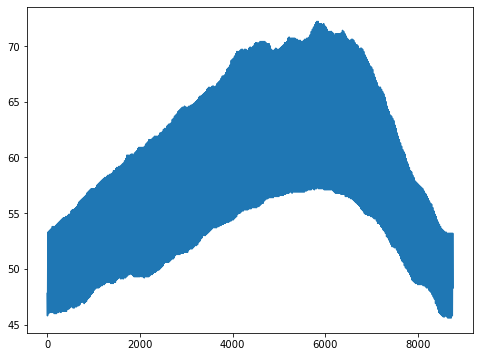

In [6]:
df.temp.plot()

In [7]:
# Once we have a date-time column on a dataframe, we can use that column as the index on our dataframe.


df = df.set_index('date')

In [8]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


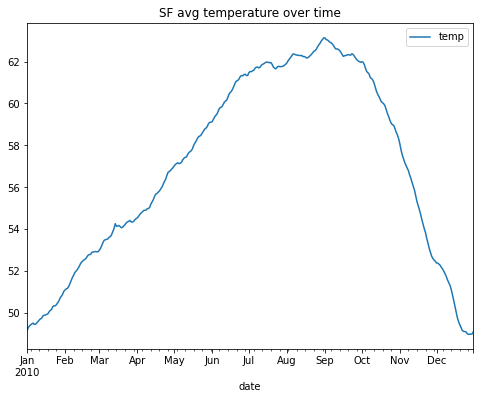

In [9]:
df.resample('D').mean().plot(title= "SF avg temperature over time");

## 2. Write the code necessary to visualize the minimum temperature over time.


In [10]:
df.resample('D').min()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1
...,...
2010-12-27,45.6
2010-12-28,45.6
2010-12-29,45.6


<AxesSubplot:title={'center':'SF min temperature over time'}, xlabel='date'>

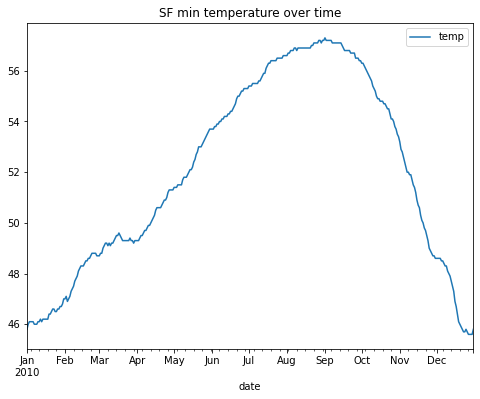

In [11]:
df.resample('D').min().plot(title='SF min temperature over time')

## 3. Write the code necessary to visualize the maximum temperature over time.


In [12]:
df.resample('D').max()

,temp
date,
2010-01-01,53.3
2010-01-02,53.4
2010-01-03,53.5
2010-01-04,53.6
2010-01-05,53.8
...,...
2010-12-27,53.2
2010-12-28,53.2
2010-12-29,53.2


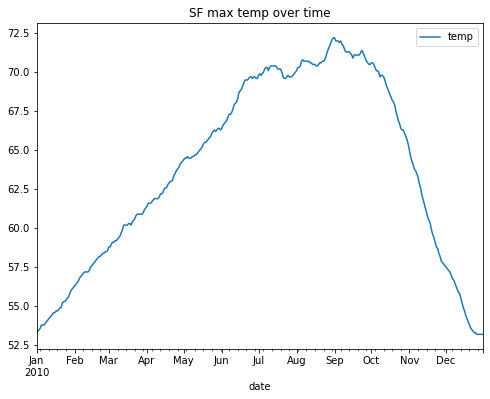

In [13]:
df.resample('D').max().plot(title="SF max temp over time");

## 4. Which month is the coldest, on average?


In [14]:
# sampling mean days then sample by months mean - date shows last day of month

df.resample('D').mean().resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956948
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [16]:
# list them all then head(1) to pull top
df.resample('D').mean().resample('M').mean().sort_values('temp').head(1)

,temp
date,
2010-01-31,49.98414


In [17]:
#R's
df.resample('M').mean().temp.sort_values()

date
2010-01-31    49.984140
2010-12-31    50.498253
2010-02-28    52.243899
2010-03-31    53.956528
2010-11-30    55.185139
2010-04-30    55.633056
2010-05-31    57.970968
2010-10-31    60.253091
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
Name: temp, dtype: float64

## 5. Which month has the highest average temperature?


In [18]:
#can do an idxmax
# df.temp.resample('M').mean().idxmax().month

df.resample('D').mean().resample('M').mean().sort_values('temp').tail(1)

,temp
date,
2010-09-30,62.487083


In [20]:
#R's
df.temp.resample('M').mean()


date
2010-01-31    49.984140
2010-02-28    52.243899
2010-03-31    53.956528
2010-04-30    55.633056
2010-05-31    57.970968
2010-06-30    60.444722
2010-07-31    61.765457
2010-08-31    62.405376
2010-09-30    62.487083
2010-10-31    60.253091
2010-11-30    55.185139
2010-12-31    50.498253
Freq: M, Name: temp, dtype: float64

## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?


In [23]:
# have the max and min - create new column for spread
df.resample('D').agg(['min','max'])

temp      
             min   max
date                  
2010-01-01  45.8  53.3
2010-01-02  46.0  53.4
2010-01-03  46.1  53.5
2010-01-04  46.1  53.6
2010-01-05  46.1  53.8
...          ...   ...
2010-12-27  45.6  53.2
2010-12-28  45.6  53.2
2010-12-29  45.6  53.2
2010-12-30  45.6  53.2
2010-12-31  45.8  53.2

[365 rows x 2 columns]

In [24]:
# remeber df.'temp'.resample

daily = df.temp.resample('D').agg(['min','max'])

daily['temp_spread'] = (daily['max'] - daily['min'])
daily

,min,max,temp_spread
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7
...,...,...,...
2010-12-27,45.6,53.2,7.6
2010-12-28,45.6,53.2,7.6
2010-12-29,45.6,53.2,7.6


In [26]:
daily.resample('M').mean().sort_values('temp_spread').tail(1)

#shows us that September had the greatest daily temperature spread compared to the other months

,min,max,temp_spread
date,,,
2010-09-30,56.903333,71.306667,14.403333


In [27]:
daily.resample('M').max().temp_spread.sort_values()

date
2010-12-31     8.9
2010-01-31     9.3
2010-02-28     9.9
2010-11-30    11.8
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-10-31    14.4
2010-06-30    14.8
2010-07-31    14.8
2010-09-30    14.9
2010-08-31    15.0
Name: temp_spread, dtype: float64

## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

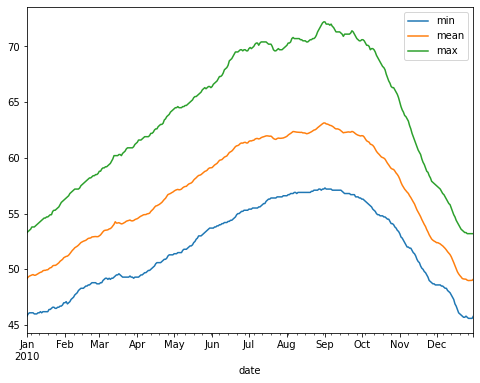

In [29]:
#Ravinder's

df.temp.resample('D').agg(['min','mean','max']).plot();

# New Dataset

In [30]:
from vega_datasets import data
df = data.seattle_weather()
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,fog
1457,2015-12-28,1.5,5.0,1.7,1.3,fog
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [ ]:
# needed to make columns
#The .dt accessor can be used to access various properties of a date. Some of the more common ones are listed here, and you can reference the pandas documentation for a full list.

In [31]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
 6   year           1461 non-null   int64         
 7   month          1461 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 91.4+ KB


In [33]:
# all good
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
year             0
month            0
dtype: int64

In [ ]:
#setting this before creating the month & year column messed me up
#df = df.set_index('date')

In [34]:
df.set_index('date').groupby('weather').resample('Y').mean()


precipitation   temp_max   temp_min      wind    year  \
weather date                                                                
drizzle 2012-12-31       0.000000  17.374194   8.667742  2.512903  2012.0   
        2013-12-31       0.062500   7.912500   1.206250  2.200000  2013.0   
        2014-12-31            NaN        NaN        NaN       NaN     NaN   
        2015-12-31       0.000000  27.700000  14.042857  2.514286  2015.0   
fog     2012-12-31       0.000000  21.100000   9.340000  2.420000  2012.0   
        2013-12-31       5.653659  15.825610   9.265854  3.357317  2013.0   
        2014-12-31       7.610596  14.520530   8.147020  3.718543  2014.0   
        2015-12-31       6.028324  13.592486   7.337572  3.283815  2015.0   
rain    2012-12-31       5.373298  12.807330   6.764398  3.625131  2012.0   
        2013-12-31       3.570000  10.621667   5.300000  3.813333  2013.0   
        2014-12-31       2.633333  27.766667  14.833333  2.900000  2014.0   
        2015-12-31      14.680000  18.540000  10.680000  4.220000  2015.0   
snow    2012-12-31       9.509524   5.395238   0.304762  4.480952  2012.0   
        2013-12-31       4.200000   6.650000   0.800000  3.500000  2013.0   
sun     2012-12-31       0.000000  20.234746   8.933898  3.120339  2012.0   
        2013-12-31       0.686829  18.471220   9.158537  2.704878  2013.0   
        2014-12-31       0.358768  18.614218   8.943602  3.157820  2014.0   
        2015-12-31       0.127222  20.683889  10.021667  3.036111  2015.0   

                       month  
weather date                  
drizzle 2012-12-31  7.387097  
        2013-12-31  2.437500  
        2014-12-31       NaN  
        2015-12-31  7.714286  
fog     2012-12-31  9.000000  
        2013-12-31  8.060976  
        2014-12-31  6.821192  
        2015-12-31  6.670520  
rain    2012-12-31  6.471204  
        2013-12-31  2.350000  
        2014-12-31  8.333333  
        2015-12-31  6.200000  
snow    2012-12-31  4.380952  
        2013-12-31  2.000000  
sun     2012-12-31  6.627119  
        2013-12-31  7.497561  
        2014-12-31  6.289100  
        2015-12-31  6.350000

In [ ]:
#class code
df.set_index('date').groupby('weather').resample('Y').size().unstack(0)


## 1. Which year and month combination has the highest amount of precipitation?


In [36]:
# chose not to df = set_index('date') - having issues with code with it

df.set_index('date').resample('M').sum().precipitation.sort_values().tail(5)


date
2012-03-31    183.0
2012-11-30    210.5
2015-11-30    212.6
2014-03-31    240.0
2015-12-31    284.5
Name: precipitation, dtype: float64

In [37]:
df.groupby(['year', 'month']).precipitation.sum().sort_values().tail(1)
# 2015-december had 284

year  month
2015  12       284.5
Name: precipitation, dtype: float64

In [38]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


## 2. Visualize the amount of monthly precipitation over time.


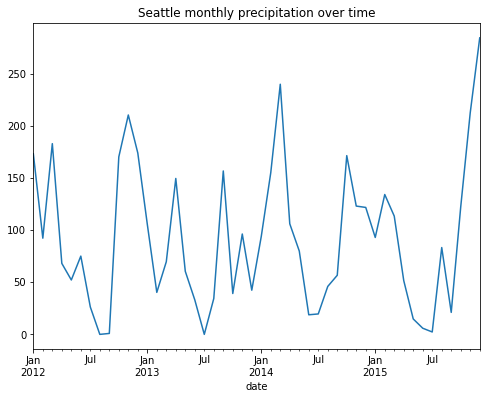

In [40]:
df.set_index('date').resample('M').precipitation.sum().plot(title = 'Seattle monthly precipitation over time');

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.


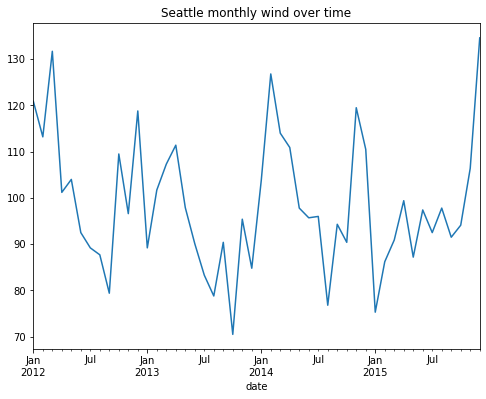

In [41]:
df.set_index('date').resample('m').wind.sum().plot(title = 'Seattle monthly wind over time');

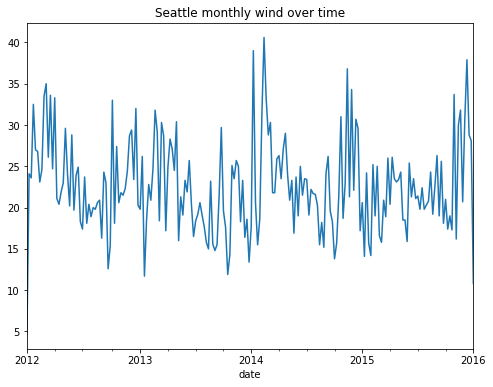

In [42]:
df.set_index('date').resample('w').wind.sum().plot(title = 'Seattle monthly wind over time');

## 4. Which year-month combination is the windiest?


In [43]:
df.groupby(['year','month']).wind.mean().sort_values().tail(1)

year  month
2014  2        4.528571
Name: wind, dtype: float64

In [46]:
df.set_index('date').wind.resample('M').mean().sort_values().tail(1)


date
2014-02-28    4.528571
Name: wind, dtype: float64

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [47]:
df[df.weather == 'sun']

,date,precipitation,temp_max,temp_min,wind,weather,year,month
7,2012-01-08,0.0,10.0,2.8,2.0,sun,2012,1
10,2012-01-11,0.0,6.1,-1.1,5.1,sun,2012,1
11,2012-01-12,0.0,6.1,-1.7,1.9,sun,2012,1
12,2012-01-13,0.0,5.0,-2.8,1.3,sun,2012,1
32,2012-02-02,0.0,8.3,1.7,2.6,sun,2012,2
...,...,...,...,...,...,...,...,...
1442,2015-12-13,1.3,7.8,6.1,6.1,sun,2015,12
1443,2015-12-14,0.0,7.8,1.7,1.7,sun,2015,12
1455,2015-12-26,0.0,4.4,0.0,2.5,sun,2015,12
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12


In [48]:
df[df.weather == 'sun'].groupby('year').tail(1)

,date,precipitation,temp_max,temp_min,wind,weather,year,month
342,2012-12-08,0.0,6.7,3.3,2.0,sun,2012,12
730,2013-12-31,0.5,8.3,5.0,1.7,sun,2013,12
1095,2014-12-31,0.0,3.3,-2.7,3.0,sun,2014,12
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun,2015,12


In [49]:
df[df.weather == 'sun'].groupby('year').count()

#issues getting this to display exactly what I want but the answer is readable

,date,precipitation,temp_max,temp_min,wind,weather,month
year,,,,,,,
2012,118,118,118,118,118,118,118
2013,205,205,205,205,205,205,205
2014,211,211,211,211,211,211,211
2015,180,180,180,180,180,180,180


In [ ]:
# ref Ravinder's code he did it by creating a new column and .mean() by 'Y'

## 6. In which month does it rain the most?


In [50]:
df[df.weather== 'rain'].groupby('month').count()

,date,precipitation,temp_max,temp_min,wind,weather,year
month,,,,,,,
1,35,35,35,35,35,35,35
2,40,40,40,40,40,40,40
3,37,37,37,37,37,37,37
4,20,20,20,20,20,20,20
5,16,16,16,16,16,16,16
6,19,19,19,19,19,19,19
7,14,14,14,14,14,14,14
8,6,6,6,6,6,6,6
9,4,4,4,4,4,4,4


In [51]:
df.groupby('month').precipitation.sum().sort_values().tail(1)

month
11    642.5
Name: precipitation, dtype: float64

## 7. Which month has the most number of days with a non-zero amount of precipitation?


In [52]:
#create boolean column
df['rainy_day'] = df.precipitation > 0

In [53]:
# groupby month - bool col - sum() - 
df.groupby('month').rainy_day.sum().sort_values().tail(1)

month
12    81
Name: rainy_day, dtype: int64

In [54]:
df.groupby('year').count()


,date,precipitation,temp_max,temp_min,wind,weather,month,rainy_day
year,,,,,,,,
2012,366,366,366,366,366,366,366,366
2013,365,365,365,365,365,365,365,365
2014,365,365,365,365,365,365,365,365
2015,365,365,365,365,365,365,365,365


In [ ]:
# rained 81 days on decemeber over 5 years

In [55]:
# I think this is right
rain_chance = (81 / (4*31)) * 100
print(f'The chance of rain in decemeber is: {rain_chance: .2f} %')

The chance of rain in decemeber is:  65.32 %


<hr style="border:1px solid black"> </hr>


### Flight Dataset

In [56]:
df = data.flights_20k()
df

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [57]:
df.shape


(20000, 5)

In [58]:
df.isnull().sum()

date           0
delay          0
distance       0
origin         0
destination    0
dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


## Convert any negative delays to 0.


In [60]:
#8482 delays
df[df['delay'] < 0].count()

date           8482
delay          8482
distance       8482
origin         8482
destination    8482
dtype: int64

In [61]:
def delay_to_zero(x):
    if x < 0:
        x = 0
    return x

In [63]:
# run function on delay column
df['delay'] = df['delay'].apply(delay_to_zero)

In [66]:
# changed 10_516 values
df.delay.value_counts()

0      10516
5        776
3        577
2        507
10       476
       ...  
215        1
241        1
190        1
244        1
232        1
Name: delay, Length: 194, dtype: int64

## Which hour of the day has the highest average delay?


In [69]:
#setting index by date - should do firsrt
df = df.set_index('date').sort_index()

In [71]:
df['hour'] = df.index.hour
df.head()

,delay,distance,origin,destination,hour
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [74]:
df.groupby('hour').delay.mean().sort_values().tail(1)
# 03 hour has the worst delays on average

hour
3    302.5
Name: delay, dtype: float64

## Does the day of the week make a difference in the delay amount?

In [80]:
# need to establish day of the week as column

df['week_day'] = df.index.day_name()
df.head()

,delay,distance,origin,destination,hour,week_day
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday


In [88]:
df.week_day.value_counts()

Wednesday    3079
Friday       3028
Thursday     3011
Monday       2980
Tuesday      2945
Sunday       2614
Saturday     2343
Name: week_day, dtype: int64

In [90]:
df.groupby('week_day').delay.mean()

week_day
Friday       17.757596
Monday        7.165772
Saturday      8.431498
Sunday       10.413542
Thursday     12.821322
Tuesday       9.410866
Wednesday    11.032478
Name: delay, dtype: float64

## Does the month make a difference in the delay amount?

In [92]:
df['month'] = df.index.month_name()
df.head()

,delay,distance,origin,destination,hour,week_day,month
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,Monday,January
2001-01-01 06:20:00,0,491,BNA,MCI,6,Monday,January
2001-01-01 06:30:00,0,251,MDW,STL,6,Monday,January
2001-01-01 07:00:00,0,361,OAK,ONT,7,Monday,January
2001-01-01 07:00:00,0,303,MSY,HOU,7,Monday,January


In [93]:
df.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

## Bonus
    -Ravinder's code

In [94]:
from vega_datasets import data
data.iowa_electricity()


,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883
5,2006-01-01,Fossil Fuels,37014
6,2007-01-01,Fossil Fuels,41389
7,2008-01-01,Fossil Fuels,42734
8,2009-01-01,Fossil Fuels,38620
9,2010-01-01,Fossil Fuels,42750


- For each row, calculate the percentage of the year's total that energy source provided.
- Lineplot of generation over time, color by source
- Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)
- Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?
- Is the total generation increasing over time?
    - How would you control for increasing consumption over time when considering how much energy is coming from each source?
    - express each number as a % of the year's total


In [95]:
df = data.iowa_electricity().set_index('year').sort_index()


In [97]:
df.shape

(51, 2)

In [98]:
# what is total generation by year?
df.net_generation.resample('YS').sum()

year
2001-01-01    40651
2002-01-01    42528
2003-01-01    42107
2004-01-01    43236
2005-01-01    44145
2006-01-01    45473
2007-01-01    49778
2008-01-01    53086
2009-01-01    51859
2010-01-01    57509
2011-01-01    56371
2012-01-01    56675
2013-01-01    56670
2014-01-01    56854
2015-01-01    56653
2016-01-01    54381
2017-01-01    56476
Freq: AS-JAN, Name: net_generation, dtype: int64

In [99]:
# map the resampled data above (total by year) to the original df

df['year_total'] = df.index.map(df.net_generation.resample('YS').sum())

In [100]:
# For each row, calculate the percentage of the year's total that energy source provided.

df['percentage'] = df.net_generation/df.year_total

In [102]:
df.head()


,source,net_generation,year_total,percentage
year,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868
2001-01-01,Nuclear Energy,3853,40651,0.094782
2001-01-01,Renewables,1437,40651,0.035350
2002-01-01,Fossil Fuels,35991,42528,0.846290
2002-01-01,Nuclear Energy,4574,42528,0.107553


In [103]:
#remember reset_index() - would have helped earlier
df1 = df.reset_index()


<AxesSubplot:xlabel='year', ylabel='net_generation'>

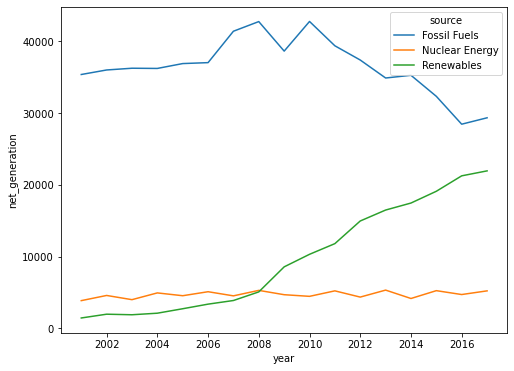

In [104]:
# Lineplot of generation over time, color by source:

sns.lineplot(data = df1, x = 'year', y = 'net_generation', hue = 'source')

In [106]:
# Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

# lets make a new column called 'c_year' which is just the year

df['c_year'] = df.index.year

In [107]:
df.head()

,source,net_generation,year_total,percentage,c_year
year,,,,,
2001-01-01,Fossil Fuels,35361,40651,0.869868,2001
2001-01-01,Nuclear Energy,3853,40651,0.094782,2001
2001-01-01,Renewables,1437,40651,0.035350,2001
2002-01-01,Fossil Fuels,35991,42528,0.846290,2002
2002-01-01,Nuclear Energy,4574,42528,0.107553,2002


In [109]:
# use pivot_table to have years as columns:

df_pivot = df.pivot_table(index = ['source'], columns= 'c_year', values = 'net_generation' )
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,35361,35991,36234,36205,36883,37014,41389,42734,38620,42750,39361,37379,34873,35250,32319,28437,29329
Nuclear Energy,3853,4574,3988,4929,4538,5095,4519,5282,4679,4451,5215,4347,5321,4152,5243,4703,5214
Renewables,1437,1963,1885,2102,2724,3364,3870,5070,8560,10308,11795,14949,16476,17452,19091,21241,21933


<AxesSubplot:xlabel='year'>

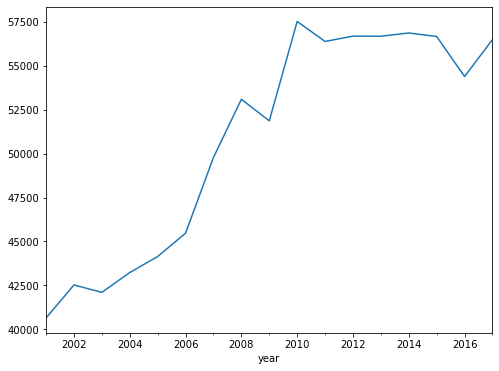

In [112]:
# Is the total generation increasing over time?

df.net_generation.resample('YS').sum().plot()

In [114]:
# How would you control for increasing consumption over time when considering how much energy is coming from each source?
# express each number as a % of the year's total

# lets normalize the dataframe (columnwise):

cols = list(df_pivot.columns)
df_pivot[cols] = df_pivot[cols] / df_pivot[cols].sum()

In [115]:
# normalized dataframe
df_pivot

c_year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
source,,,,,,,,,,,,,,,,,
Fossil Fuels,0.869868,0.846290,0.860522,0.837381,0.835497,0.813978,0.831472,0.804996,0.744712,0.743362,0.698249,0.659532,0.615370,0.620009,0.570473,0.522922,0.519318
Nuclear Energy,0.094782,0.107553,0.094711,0.114002,0.102798,0.112045,0.090783,0.099499,0.090225,0.077397,0.092512,0.076700,0.093894,0.073029,0.092546,0.086482,0.092322
Renewables,0.035350,0.046158,0.044767,0.048617,0.061706,0.073978,0.077745,0.095505,0.165063,0.179242,0.209239,0.263767,0.290736,0.306962,0.336981,0.390596,0.388360


<AxesSubplot:xlabel='c_year'>

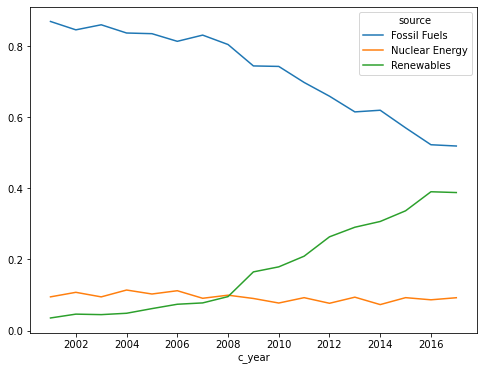

In [116]:
# transpose the dataframe above and plot the data for three sources
df_pivot.T.plot()

Takeaways:

Fossil fuel use (as % of total) is decreasing.
Nuclear energy is flat
Renewables use is increasing

- Use the sf_temps dataset
- Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)
- How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.
- Create pretty labels for time plots
- Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar

Explore the birdstrikes dataset.

df = data.birdstrikes()
